In [1]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
coeval8 = p21c.run_coeval(
    redshift = 8.0,
    user_params = {"HII_DIM": 100, "BOX_LEN": 100, "USE_INTERPOLATION_TABLES": True},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":20.0}),
    random_seed=12345
)

/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vz
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_utils.py:815:

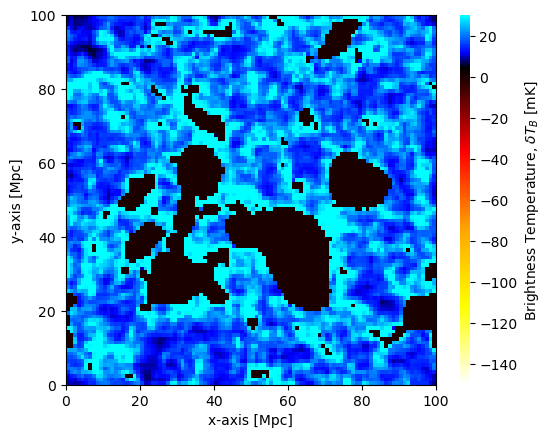

In [3]:
plotting.coeval_sliceplot(coeval8);
plt.savefig('coeval_cube')

In [5]:
box_len = 512
lightcone = p21c.run_lightcone(redshift = 5.0,
    max_redshift = 13.0,
    user_params = {"HII_DIM":126, "BOX_LEN":512 }, 
    lightcone_quantities=("brightness_temp", 'density'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

(126, 126, 551)


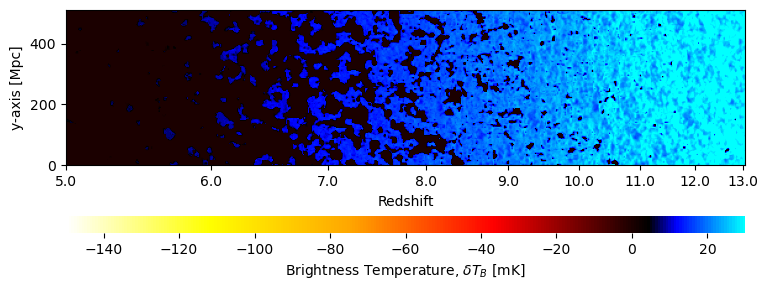

In [6]:
plotting.lightcone_sliceplot(lightcone);
print(lightcone.shape)

In [7]:
redshifts = getattr(lightcone , 'lightcone_redshifts')
distances = getattr(lightcone, 'lightcone_distances')

In [8]:
dist_max = np.max(distances)
print(dist_max)

10185.434506865751


In [9]:
theta = np.arctan((box_len/2)/dist_max)
imgsize = print(2*theta)

0.0502572794416906


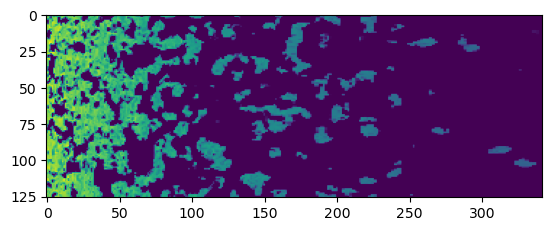

In [10]:
#could use observedlightcone code from vlad to slice lightcone
cone = lightcone.brightness_temp
# n_steps nuber of slices needed
n_steps = 342
dims = (lightcone.shape)[0]
z = np.linspace(redshifts[0],redshifts[-1],n_steps)

lc = np.zeros((dims,dims,n_steps))
#noise data : 108MHz to 210.3MHZ with seperation of 0.3MHZ
dt =0.3 #Mhz

for i in range(342):
    freq = 108 + (dt*i)
    zlc = (1420/freq) -1
    index = np.abs(z - zlc).argmin()
    lc[:,:,i] = cone[:,:,index]
    
plt.imshow(lc[45,:,:])

In [11]:
dir = './Boxes/'

#change file name for different lightcones
fname = 'higher_qual'

#save lightcone in boxes folder
fits.writeto(dir+fname+'.fits',np.transpose(lc,(2,0,1)),overwrite=True)

## ionized coeval cube

In [12]:
#coeval cubes from redshift 5 to 13, including 5 and 13
coevals = p21c.run_coeval(
     redshift = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0],
     user_params={'HII_DIM': 100, "USE_INTERPOLATION_TABLES": False}
)

In [13]:
ionized_coevals = np.zeros((9,100,100,100))
Average_ionization = np.zeros(9)
for i in range(9):
    cube = coevals[i]
    ionized = cube.xH_box
    ionized_coevals[i,:,:,:] = ionized
    average = np.mean(ionized)
    Average_ionization[i] = average

In [14]:
# Average_ionization: where 1 is unionzed and 0 is completely ionized
print(Average_ionization)
print(np.shape(ionized_coevals))

[0.00190089 0.06660806 0.30092692 0.56726575 0.74492526 0.85134429
 0.91497654 0.95317316 0.97541189]
(9, 100, 100, 100)


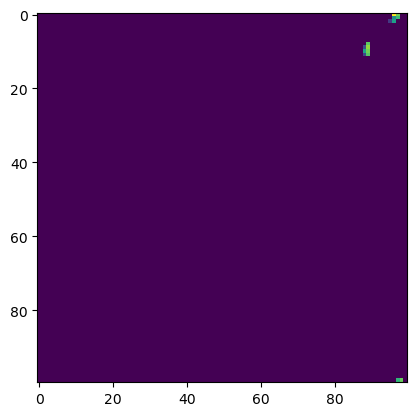

In [15]:
#redshift 5, slice of the coeval cube of dims 100,100,100
plt.imshow(ionized_coevals[0,0,:,:])

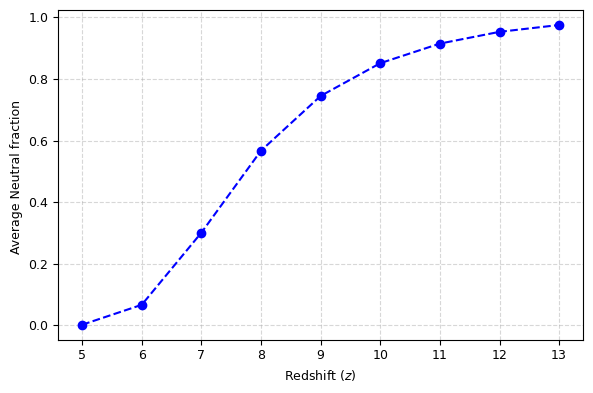

In [16]:
x = np.arange(5,14,1)

plt.rcParams.update({'font.size' : 9})
plt.figure(figsize = (6,4))
plt.plot(x, Average_ionization, marker = 'o', linestyle = '--', color = 'b')

#add title and labels
#plt.title('Ionization against redshift')
plt.xlabel(r'Redshift ($z$)')
plt.ylabel('Average Neutral fraction ')
plt.grid(True, linestyle= '--', alpha = 0.5)
plt.tight_layout()
#plt.savefig('Submit/Average_Ionization_against_redshift.png')